In [20]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.graph_objects as go

In [9]:
x = datetime.datetime.now()
todays_date = x.strftime("%Y")+"-"+x.strftime("%m")+"-"+x.strftime("%d")
todays_date

'2025-04-18'

In [10]:
ticker = "AAPL"
stock = yf.Ticker(ticker)
stock

yfinance.Ticker object <AAPL>

In [11]:
df = yf.download(ticker,start="2005-01-01",progress=False, auto_adjust=True)
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2005-01-03,0.952312,0.979698,0.941930,0.974732,691992000
2005-01-04,0.962093,0.985114,0.947497,0.959835,1096810400
2005-01-05,0.970519,0.981804,0.963747,0.969916,680433600
2005-01-06,0.971271,0.976688,0.952914,0.973076,705555200
2005-01-07,1.041991,1.047709,0.974280,0.978042,2227450400


In [12]:
df["simple_rtn"] = df["Close"].pct_change()
df["log_rtn"] = np.log(df["Close"]/df["Close"].shift(1))

In [13]:
df.head()
# pivot with date and price
# unstack with date, col = price

Price,Close,High,Low,Open,Volume,simple_rtn,log_rtn
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2005-01-03,0.952312,0.979698,0.941930,0.974732,691992000,NaN,NaN
2005-01-04,0.962093,0.985114,0.947497,0.959835,1096810400,0.010270,0.010217
2005-01-05,0.970519,0.981804,0.963747,0.969916,680433600,0.008758,0.008720
2005-01-06,0.971271,0.976688,0.952914,0.973076,705555200,0.000775,0.000775
2005-01-07,1.041991,1.047709,0.974280,0.978042,2227450400,0.072811,0.070282


In [14]:
df.shape

(5106, 7)

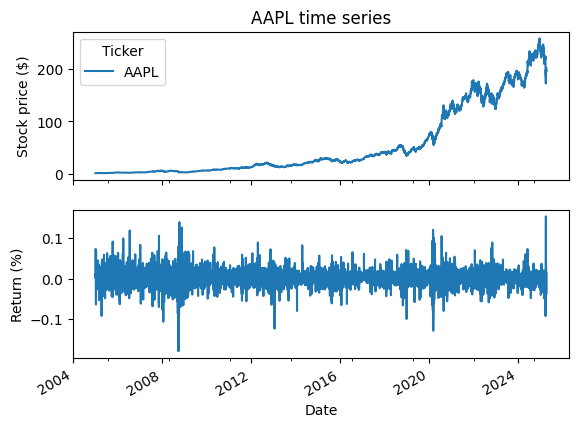

In [15]:
fig, ax = plt.subplots(2, 1, sharex=True)
df["Close"].plot(ax=ax[0])
ax[0].set(title="AAPL time series", ylabel="Stock price ($)")
df["simple_rtn"].plot(ax=ax[1])
ax[1].set(ylabel="Return (%)")
plt.show()

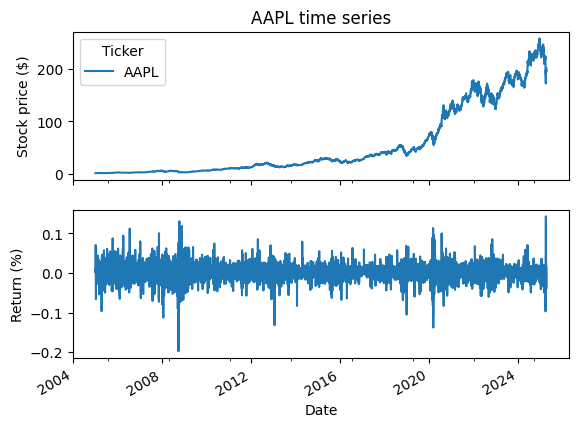

In [16]:
fig, ax = plt.subplots(2, 1, sharex=True)
df["Close"].plot(ax=ax[0])
ax[0].set(title="AAPL time series", ylabel="Stock price ($)")
df["log_rtn"].plot(ax=ax[1])
ax[1].set(ylabel="Return (%)")
plt.show()

In [17]:
df = df.resample("ME").last()

In [18]:
cf.go_offline()

In [19]:
fig = go.Figure(data=go.Candlestick(x=df.index,open=df["Open"],high=df["High"],low=df["Low"],close=df["Close"]),)
fig.update_layout(title="Apple's stock prices",yaxis_title="Price ($)")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Checking unemployment/inflation

In [ ]:
import nasdaqdatalink
import pandas_datareader.data as web
nasdaqdatalink.ApiConfig.api_key = "RH9CEHrdyBxbQ3C8mqux"

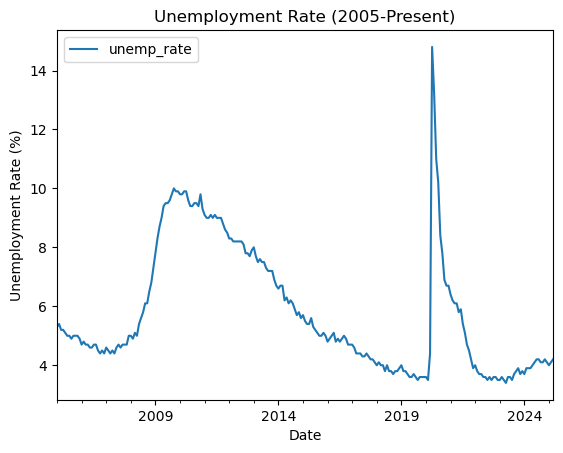

In [ ]:
#unemployment_rate
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime.now()
 
df_unemp = web.DataReader("UNRATE", "fred", start, end)

# Rename columns for clarity
df_unemp.rename(columns={"UNRATE": "unemp_rate"}, inplace=True)

# Plot the unemployment rate
df_unemp.plot(title="Unemployment Rate (2005-Present)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

In [ ]:
df_unemp['year'] = df_unemp.index.year
df_unemp['month'] = df_unemp.index.strftime("%b")
df_unemp

,unemp_rate,year,month
DATE,,,
2005-01-01,5.3,2005,Jan
2005-02-01,5.4,2005,Feb
2005-03-01,5.2,2005,Mar
2005-04-01,5.2,2005,Apr
2005-05-01,5.1,2005,May
...,...,...,...
2024-11-01,4.2,2024,Nov
2024-12-01,4.1,2024,Dec
2025-01-01,4.0,2025,Jan


In [ ]:
df_unemp_2005_2010 = df_unemp[(df_unemp['year']>=2005) & (df_unemp['year']<=2010)]
df_unemp_2010_2015 = df_unemp[(df_unemp['year']>=2010) & (df_unemp['year']<=2015)]
df_unemp_2015_2020 = df_unemp[(df_unemp['year']>=2015) & (df_unemp['year']<=2020)]
df_unemp_2020 = df_unemp[(df_unemp['year']>=2020)]

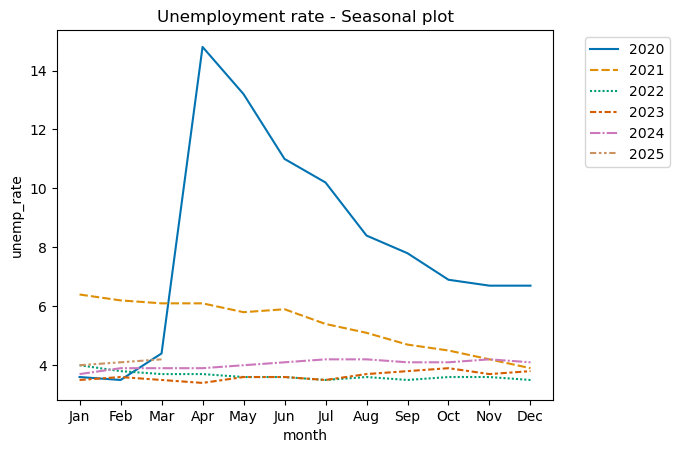

In [ ]:
sns.lineplot(df_unemp_2020,x="month",y="unemp_rate",hue="year",style="year",legend="full",palette="colorblind")
plt.title("Unemployment rate - Seasonal plot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
#Find CPI - Consumer Price Index (CPI) rate from NASDAQ Link.

"""            
df_cpi = (nasdaqdatalink.get(dataset="RATEINF/CPI_USA", 
                       start_date="2009-12-01", 
                       end_date="2020-12-31")
    .rename(columns={"Value": "cpi"})
 )
df_cpi

"""
# Alternative: Pandas_reader provides easy access to a range a financial data sources on the web

 
# Specify the start and end dates
start = '2005-01-01'
 

# Fetch CPI data from FRED
df_cpi = web.DataReader('CPIAUCNS', 'fred', start)
df_cpi.reset_index(inplace=True)
df_cpi.columns = ['Date', 'cpi']
print(df_cpi)

          Date      cpi
0   2005-01-01  190.700
1   2005-02-01  191.800
2   2005-03-01  193.300
3   2005-04-01  194.600
4   2005-05-01  194.400
..         ...      ...
238 2024-11-01  315.493
239 2024-12-01  315.605
240 2025-01-01  317.671
241 2025-02-01  319.082
242 2025-03-01  319.799

[243 rows x 2 columns]


In [ ]:
#convert date format  from 2024-12-01 format to 2024-01-12
df_cpi['Date'] =  pd.to_datetime(df_cpi['Date']).dt.strftime('%Y-%d-%m')
df_cpi

,Date,cpi
0,2005-01-01,190.700
1,2005-01-02,191.800
2,2005-01-03,193.300
3,2005-01-04,194.600
4,2005-01-05,194.400
...,...,...
238,2024-01-11,315.493
239,2024-01-12,315.605
240,2025-01-01,317.671
241,2025-01-02,319.082


In [ ]:
df_cpi.set_index(['Date'], inplace=True)
df_cpi
 

,cpi
Date,
2005-01-01,190.700
2005-01-02,191.800
2005-01-03,193.300
2005-01-04,194.600
2005-01-05,194.400
...,...
2024-01-11,315.493
2024-01-12,315.605
2025-01-01,317.671


In [ ]:
 df_cpi.

DatetimeIndex(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30',
               '2005-05-31', '2005-06-30', '2005-07-31', '2005-08-31',
               '2005-09-30', '2005-10-31',
               ...
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30'],
              dtype='datetime64[ns]', name='Date', length=244, freq='ME')

In [ ]:
#df_cpi1.index = pd.MultiIndex.from_product([['Date'], df_cpi1.index], names=['Ticker',''])
 

KeyError: "None of ['Ticker'] are in the columns"

# volatilities 

In [ ]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))



,cpi
Date,
2005-01-01,190.700
2005-01-02,191.800
2005-01-03,193.300
2005-01-04,194.600
2005-01-05,194.400
...,...
2024-01-11,315.493
2024-01-12,315.605
2025-01-01,317.671


MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

(MultiIndex([(     'Close', 'AAPL'),
             (      'High', 'AAPL'),
             (       'Low', 'AAPL'),
             (      'Open', 'AAPL'),
             (    'Volume', 'AAPL'),
             ('simple_rtn',     ''),
             (   'log_rtn',     '')],
            names=['Price', 'Ticker']),
 Index(['cpi'], dtype='object'))